**Group 18 Project Proposal**

*Title: Diabetes Data*

**Introduction:** Diabetes is classified by hemoglobin A1c (a component of blood) levels that are equal to or greater than 6.5%. Research shows higher Body Mass Index (BMI) and blood glucose levels to often be good indicators of diabetes (Patel et al., 2023).

**Question:** Can we predict a patient's diabetes diagnosis based on their blood glucose level (*mg/dL*) and BMI (*kg/m2)?

Our data set comes from Kaggle and explores diabetes diagnosis (regardless of type) in a sample of several hundred rural African-American patients. We use data from the columns “height”(*in*), “weight”(*lbs*), “stab.glu”(blood glucose, *mg/dl*) and “glyhb”(hemoglobin A1c, *%*) and wrangle it for our algorithm. 
https://www.kaggle.com/datasets/imtkaggleteam/diabetes 

**References:**
Patel, B. J., Mehta, D. N., Vaghani, A., & Patel, K. (2023). Correlation of Body Mass Index (BMI) with Saliva and Blood Glucose Levels in Diabetic and Non-Diabetic Patients. Journal of pharmacy & bioallied sciences, 15(Suppl 2), S1204–S1207. https://doi.org/10.4103/jpbs.jpbs_159_23

**Preliminary exploratory data analysis:**
First, we install and load packages necessary for our proposal as well as further analysis. 

In [3]:
library(rvest)
library(tidyverse)
library(tidymodels)
install.packages("themis")
library(themis)
set.seed(0102)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()         masks stats::filter()
✖ readr::guess_encoding() masks rvest::guess_encoding()
✖ dplyr::lag()            masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed


We read in our dataset from Kaggle. 

In [2]:
URL <- 'https://raw.githubusercontent.com/wmma2/group_18_project/main/diabetes.csv'
raw_data <- read_csv(URL)
glimpse(raw_data)

Rows: 403 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): location, gender, frame
dbl (16): id, chol, stab.glu, hdl, ratio, glyhb, age, height, weight, bp.1s,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 403
Columns: 19
$ id       <dbl> 1000, 1001, 1002, 1003, 1005, 1008, 1011, 1015, 1016, 1022, 1…
$ chol     <dbl> 203, 165, 228, 78, 249, 248, 195, 227, 177, 263, 242, 215, 23…
$ stab.glu <dbl> 82, 97, 92, 93, 90, 94, 92, 75, 87, 89, 82, 128, 75, 79, 76, …
$ hdl      <dbl> 56, 24, 37, 12, 28, 69, 41, 44, 49, 40, 54, 34, 36, 46, 30, 4…
$ ratio    <dbl> 3.6, 6.9, 6.2, 6.5, 8.9, 3.6, 4.8, 5.2, 3.6, 6.6, 4.5, 6.3, 6…
$ glyhb    <dbl> 4.31, 4.44, 4.64, 4.63, 7.72, 4.81, 4.84, 3.94, 4.84, 5.78, 4…
$ location <chr> "Buckingham", "Buckingham", "Buckingham", "Buckingham", "Buck…
$ age      <dbl> 46, 29, 58, 67, 64, 34, 30, 37, 45, 55, 60, 38, 27, 40, 36, 3…
$ gender   <chr> "female", "female", "female", "male", "male", "male", "male",…
$ height   <dbl> 62, 64, 61, 67, 68, 71, 69, 59, 69, 63, 65, 58, 60, 59, 69, 6…
$ weight   <dbl> 121, 218, 256, 119, 183, 190, 191, 170, 166, 202, 156, 195, 1…
$ frame    <chr> "medium", "large", "large", "large", "medium", "large", "medi…
$ bp.1s    <dbl> 1

The dataset is already tidy. To make it suitable for our analysis, we create a categorical **diagnosis** column from the given *glyhb* column and a **BMI** (in *kg/m^2*) column using the *weight* and *height* columns. We filter out the rows with missing values as they are not significant to our dataset, and select the necessary columns: **stab.glu**, **BMI** and **diagnosis**. 

The data is now wrangled and suitable for our analysis. 

In [3]:
tidy_data <- raw_data |>
        mutate(diagnosis = if_else(glyhb >= 6.5, "yes", "no")) |>
        mutate(diagnosis = as_factor(diagnosis))|>
        mutate(height_m = height*0.0254, 
               weight_kg = weight*0.45359237,
               BMI = weight_kg/height_m^2) |>
        filter(!is.na(glyhb + BMI + stab.glu)) |>
        select(stab.glu, BMI, diagnosis)
head(tidy_data)

stab.glu,BMI,diagnosis
<dbl>,<dbl>,<fct>
82,22.13096,no
97,37.41923,no
92,48.37028,no
93,18.63784,no
90,27.82477,yes
94,26.49935,no


We split the data for training and testing.  

In [4]:
data_split <- initial_split(tidy_data, prop = 0.75 , strata = diagnosis)
train_data <- training(data_split)
test_data <- testing(data_split)

train_count <- train_data|>
    group_by(diagnosis)|>
    summarize(count = n()) 

train_mean <- train_data|>
    summarize(stab.glu_mean = mean(stab.glu),
              BMI_mean = mean(BMI)) 

train_NAs <- sum(is.na(train_data))

train_count
train_mean
train_NAs

diagnosis,count
<fct>,<int>
no,240
yes,47


stab.glu_mean,BMI_mean
<dbl>,<dbl>
107.5714,28.91491


[1] 0

From the count tibble, we see that our data is uneven and needs to be upscaled when training our algorith. Our dataset has no missing values. The means also vary too much hinting at different distributions. To visualize, we plot our predictors:

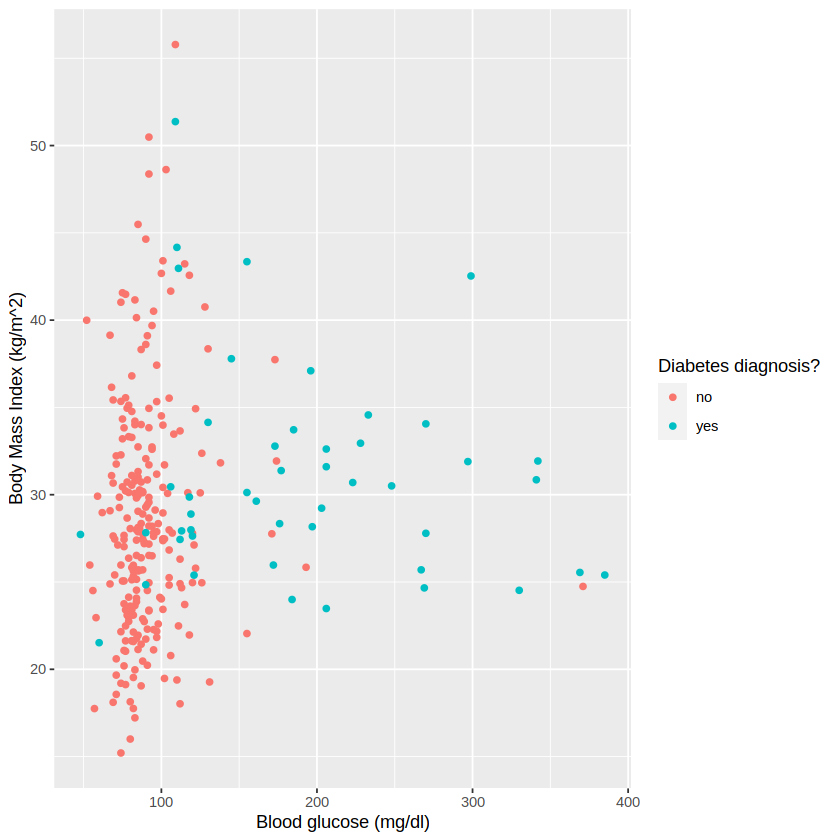

In [5]:
train_plot <- train_data |>
    ggplot(aes(x = stab.glu, y = BMI, colour = diagnosis)) +
    geom_point() +
    labs(x = "Blood glucose (mg/dl)", y = "Body Mass Index (kg/m^2)", colour = "Diabetes diagnosis?") 
train_plot

The scatterplot shows that blood glucose (stab.glu) is distributed on a larger scale, meaning it will have greater effect on our k-NN model. To counter this, we will standardize the predictors in our training data!

**Methods:**
We will be conducting our analysis by creating a the K-nearest neighbors classification algorithm. We will use the blood glucose level “stab.glu” and “BMI” (created from "height" and "weight" columns of the original dataset) columns as our predictors and “diagnosis” (created from "stab.glu" column) as our classification column. Our aim is to predict a patient’s diabetes diagnosis based on their blood glucose level and BMI. 

We will be visualizing our results using a scatter plot with Blood Glucose on the x-axis and BMI on the y-axis. The color of the points will determine if the patient has been diagnosed with Diabetes.  

**Expected outcomes and Significance:**
We expect African American patients with relatively higher levels of blood glucose levels and BMI to be classified with a diabetes diagnosis. The significance of our expected outcomes can encourage patients to use our algorithm as a preliminary examination tool before getting a hemoglobin test for diabetes.

Our analysis could lead to future questions such as, *"How do these trends compare to other ethnicities? Are BMI and stable blood glucose levels still good indicators?”*

<font size="8">**Final Report**

<font size="5">**Introduction**

**What is Diabetes?**

Diabetes is a metabolic condition where the body is unable to regulate blood sugar levels effectively (American Diabetes Association, 2013). It is a common disease, with 38.5% of men and 32.8% of women in the US at risk of the condition as reported in a medical study (Gray et al., 2015). There are 2 types of diabetes: Type I or Type II. Type I diabetes is when the body doesn’t produce insulin, a blood sugar regulating hormone, and is therefore unable to regulate blood sugar levels.  Type I affects around 5-10% of those with diabetes. On the contrary, Type II diabetes is when the body either doesn’t produce enough insulin or doesn’t use it effectively and this accounts for around 90-95% of those with diabetes (American Diabetes Association, 2013).

**Diagnosing Diabetes**

The standard for diabetes diagnosis is indicated by blood test results showing Hemoglobin A1c (a component of blood) levels ≥ 6.5 (American Diabetes Association (2013), Patel et al., 2023). Interestingly, studies have found that those with even moderately higher Body Mass Index (BMI) are associated with an increased risk of developing diabetes (Gray et al., 2015., Patel et al., 2023).

**Biases in Diabetes literature review**

However, a 2023 study on the diagnosis of diabetes has found that current literature on diabetes diagnosis is skewed due to diagnosis models being based on data collected largely from non-hispanic Whites. Implicating a dangerous underdiagnosis of diabetes among non-hispanic Blacks (Cronjé et al., 2023). Thus, we have chosen to conduct our data analysis on this dataset from Kaggle consisting of African-American participants in hopes of contributing diverse data towards the diabetes literature with the aim of working towards avoiding biases in diagnostic models and equity in healthcare. 

**Dataset & Question**

The dataset we will be using for this project contains demographic and laboratory variables on African-American patients including height, weight, gender, age, Hemoglobin A1c level, blood pressure etc. The dataset was initially compiled by Mohamadreza Momeni to use for machine learning models in diabetes diagnosis. For this project, we aim to answer the question: Can we predict a patient's diabetes diagnosis based on their blood glucose level (mg/dL) and BMI (*kg/m2)?


<font size="5">**Methods**
    
-- Description of methods -- write this after we've done all the code --

In [6]:
#1: Loading Data from URL

URL <- 'https://raw.githubusercontent.com/wmma2/group_18_project/main/diabetes.csv'
diabetes_data <- read_csv(URL)

diabetes_data

Rows: 403 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): location, gender, frame
dbl (16): id, chol, stab.glu, hdl, ratio, glyhb, age, height, weight, bp.1s,...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1000,203,82,56,3.6,4.31,Buckingham,46,female,62,121,medium,118,59,NA,NA,29,38,720
1001,165,97,24,6.9,4.44,Buckingham,29,female,64,218,large,112,68,NA,NA,46,48,360
1002,228,92,37,6.2,4.64,Buckingham,58,female,61,256,large,190,92,185,92,49,57,180
1003,78,93,12,6.5,4.63,Buckingham,67,male,67,119,large,110,50,NA,NA,33,38,480
1005,249,90,28,8.9,7.72,Buckingham,64,male,68,183,medium,138,80,NA,NA,44,41,300
1008,248,94,69,3.6,4.81,Buckingham,34,male,71,190,large,132,86,NA,NA,36,42,195
1011,195,92,41,4.8,4.84,Buckingham,30,male,69,191,medium,161,112,161,112,46,49,720
1015,227,75,44,5.2,3.94,Buckingham,37,male,59,170,medium,NA,NA,NA,NA,34,39,1020
1016,177,87,49,3.6,4.84,Buckingham,45,male,69,166,large,160,80,128,86,34,40,300
